
# Measuring Hydraulic Properties of Soil With ESP32


29 July, 2021\
Yedidya Harris, Yehuda Yungshtein\
The Faculty of Agriculture, The Hebrew University of Jerusalem (ISRAEL)

---


##  Introduction

In this project we tried to produce a simple and accurate tool for measuring the hydraulic properties of soil.

While many farmers are aware of their vegetation status and even certain properties of the soil (soil texture, amount of nutrients, amount of limestone, etc.), hydraulic tests of the soil are not widely used, and most farmers rely on approximations derived from soil texture.

Testing hydraulic properties for the soil is expensive due to the high cost of the sensors - as a result many farmers prefer to forgo these measurements. One of the methods for testing the hydraulic properties of the soil is using a Hyprop device (for more information, see the links attached at the end of the document). In this project we assembled a device with the same operating principle based on ESP32. We called the device: SHC Meter - Soil Hydraulic Conductivity Meter.
The final products we expect to reach:
1.	Soil Retention Curve: 
The soil retention curve (aka 'curve retention' or 'soil moisture characteristic curve') describes the relationship between the moisture content and the soil matrix head in a state of equilibrium. The retention curve is of great importance in describing the hydraulic properties of the soil and is required for the purpose of modeling flow and conveyance processes, for the benefit of irrigation management and many other applications related to the management or evaluation of groundwater. There are different models for calculating the retention curve of soils.
2.	Hydraulic Conductivity: 
Another important feature of the soil is its hydraulic conductivity. Hydraulic conductivity depends on the properties of the soil and the properties of the liquid flowing in it. It expresses the ability of the soil to pass fluids or solutes through it, whether it is water, nutrients, pollutants, etc. Hydraulic conductivity can be seen as a feature that expresses "how easily the water in the soil flows through it" and is very important for agriculture in the context of irrigation and soil feeding. Sandy soils are usually characterized by high hydraulic conductivity while clayey soils are characterized by low hydraulic conductivity.



## Methods

In this project we calculated the **hydraulic conductivity of the soil** using the following formula:

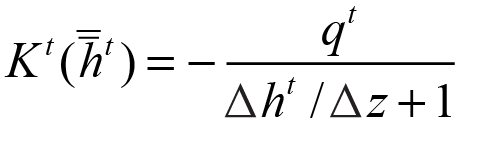


k - The hydraulic conductivity of the soil [cm/sec]

q - The water flow in the soil [cm/sec]

Δh - The difference in the matrix potential of the soil between the two measurement points [cm]

Δz - The height difference between the two measuring points [cm]
<br />



For the purpose of calculating a **soil retention curve** there are many methods most of which are based on empirical methods. We measured the volumetric moisture content in the soil sample by the weight of the sample. Assuming the water is the only component leaving the system during the experiment (by evaporation) a change in system weight is due only to a change in the moisture content. The volumetric moisture content was calculated using an analytical scale at the beginning of the experiment and the scale we built was calibrated relative to it. We measured the matrix head in the ground using the tensiometers we built when the assumption is that the pressure in the ground is relatively uniform and it is calculated as an average between the 2 tensiometers (in our case one of the tensiometers did not work so we relied on only one). Assuming that the moisture content is uniform throughout the column, the matrix head measured in the tensiometers can be related to the moisture content calculated using the sample weight. The advantage of using this method is that with the help of the pressure and weight readings, tens of thousands of measurement points are obtained and thus the measurement is more reliable. Its disadvantages are the assumptions mentioned above.
<br />
<br />
For detailed instructions on assembling the SHC Meter visit our instructable: [here](https://www.instructables.com/Measuring-Hydraulic-Properties-of-Soil-With-ESP32/)

## Results

### Soil Hydraulic Conductivity 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#file_path = '/content/drive/MyDrive/gdrive_folder/Agrotech_project/final_data.xlsx' # enter your data file path here - this line can be deleted after Yehuda agrees
file_path = 'https://github.com/deedeeharris/agritech2021/blob/main/report/final_data.xlsx?raw=true' # enter your data file path here
df = pd.read_excel(file_path, names = ['Date', 'ID', 'Weight_(g)', 'Pressure_Bottom_(cmH20)', 'Pressure_Top_(cmH20)']) # reading the raw date (xlsx)
# make 'date' the dataframe index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
#df  #uncomment to see the dataFrame

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname IDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


**Plotting the raw results:**

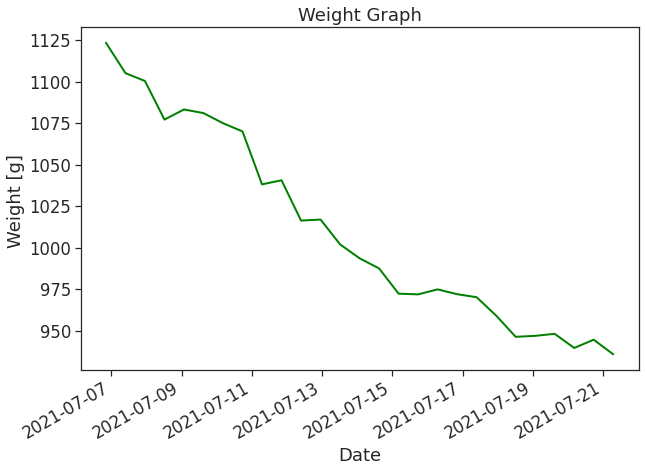

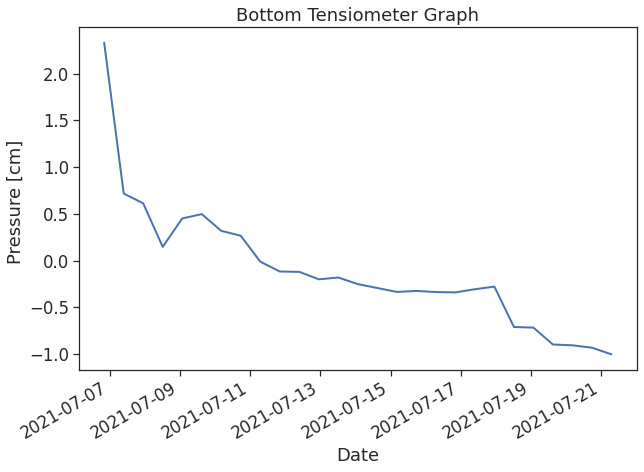

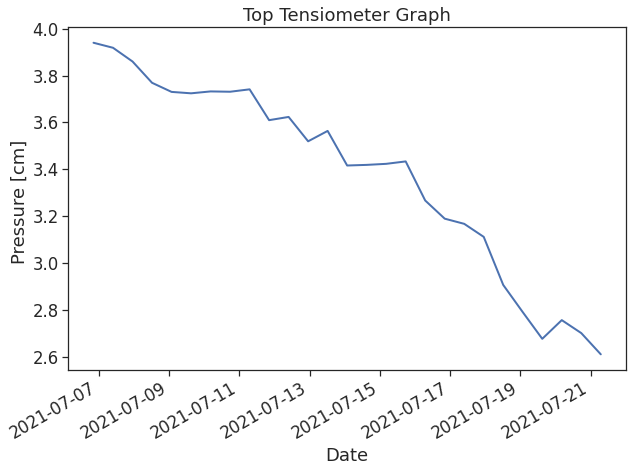

In [11]:
# weight graph
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Weight_(g)'],  linewidth=2, color = "green")
ax.set(xlabel="Date",
       ylabel="Weight [g] ",
       title="Weight Graph");
plt.gcf().autofmt_xdate()  # makes slated dates
# Bottom tensiometer
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Pressure_Bottom_(cmH20)'],  linewidth=2)
ax.set(xlabel="Date",
       ylabel="Pressure [cm] ",
       title="Bottom Tensiometer Graph");
plt.gcf().autofmt_xdate()  
# Top tensiometer
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Pressure_Top_(cmH20)'],  linewidth=2)
ax.set(xlabel="Date",
       ylabel="Pressure [cm] ",
       title="Top Tensiometer Graph");
plt.gcf().autofmt_xdate() 

1. As can be seen in the graphs it is not possible to refer to all the results of the experiment, due to inaccuracies in the first and last part of the experiment. Therefore we will create new graphs from the data in the time frame where stable results can be obtained. In addition, we will delete the 2 high values ​​obtained by the scale as a result of deviation so that they do not interfere with the data.

2. In fact the experiment consists of tens of thousands of measurement points. In order to "align" the graph and prevent deviations we will use the resample function for an average of 800 minutes each time.

3. The data from the top tensiometer does not seem reliable (throughout the experiment there was a pressure decrease of only 1 cmH2O). It could be a faulty pressure sensor or there was a space around the tensiometer with air that did not let the water pressure be felt. In order to analyze the data we will only use the results from the lower tensiometer.

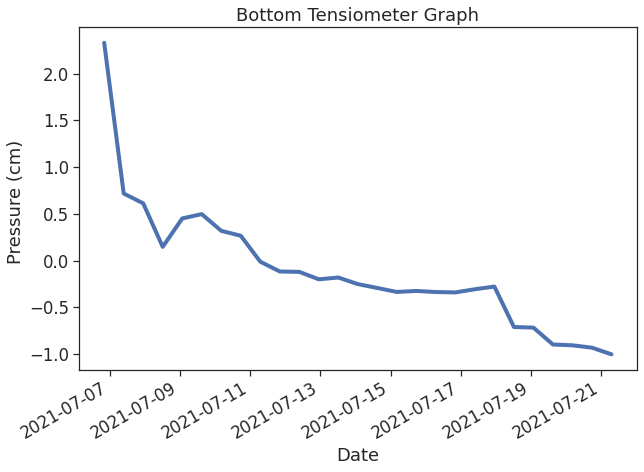

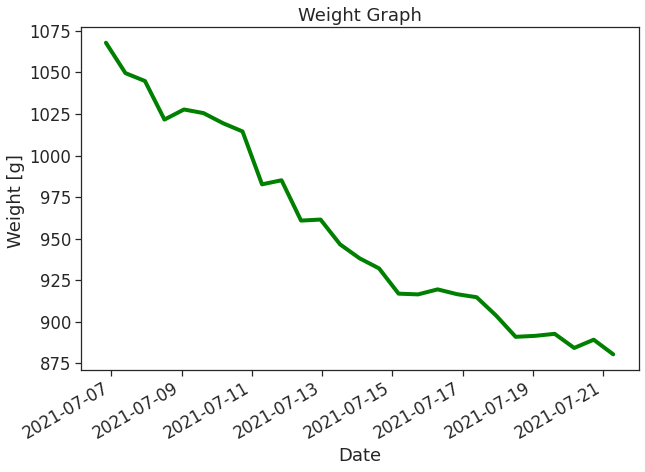

In [4]:
start_date = '2021-07-06 20:14:33' # since readings weren't accurate at the begining of the exp, we chose a later start_date for the plot
end_date = '2021-07-21 15:53:15' # # we chose an earlier end_date for the plot from the raw data, because we left the SHC Meter running for an extra few days
df_raw_backup = pd.DataFrame.copy(df) # backup for the raw data frame
df = df[df['Weight_(g)'] < 1100] # deleting the high values of weight in the middle of the measurment
df = df.loc[start_date:end_date]
df = (df.resample('800min', origin='start') # resample results, calc the mean every 800min
                        .mean()
             )
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Pressure_Bottom_(cmH20)'],  linewidth=4, )
ax.set(xlabel="Date",
       ylabel="Pressure (cm) ",
       title="Bottom Tensiometer Graph");
plt.gcf().autofmt_xdate()  
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Weight_(g)'],color = "green",  linewidth=4)
ax.set(xlabel="Date",
       ylabel="Weight [g] ",
       title="Weight Graph");
plt.gcf().autofmt_xdate() 
# len(df) # uncomment to see the number of dots plotted after resampling 

In [5]:
# column of the difference between the pressures in the tensiometer:

# df['Delta P(cmH20)'] = df['Pressure_Top_(cmH20)'] - df['Pressure_Bottom_(cmH20)'] # Use this line instead of line 4 when both pressure sensors give 'good' date
df['Delta P(cmH20)'] = df['Pressure_Bottom_(cmH20)']
# column of Q
ring_weight = 125.9 # [g], the weight of the plastic ring with sensors (without soil)
start_weight = 1137.5  # the initial weight of the entire system (ring, soil, water). must weigh in the beginning.
df['Weight_(g)'] = df['Weight_(g)'] + 55.5 # calibration due to offset of our scale
df['delta_Mass_(g)'] = start_weight - df['Weight_(g)'] - ring_weight # calcs the change in weight influenced by water evaporation.
df['Q(cm^3/sec)'] = df['delta_Mass_(g)']/15 # convert from cm^3/15sec into cm^3/sec

# column of q based on the equation q = Q/A

diameter = 10.536 # this is the diameter of the ring [cm]  
Area = (diameter/2)**2 * np.pi   # [cm^2] , the area of the pipe
df['q(cm/sec)'] = df['Q(cm^3/sec)'] / Area

# column of K - soil hydraulic conductivity
delta_z = 2 # [cm]
df['k(cm/s)'] = -df['q(cm/sec)']/(1 + (df['Delta P(cmH20)']/delta_z))

# df  #uncomment to see the full DataFrame

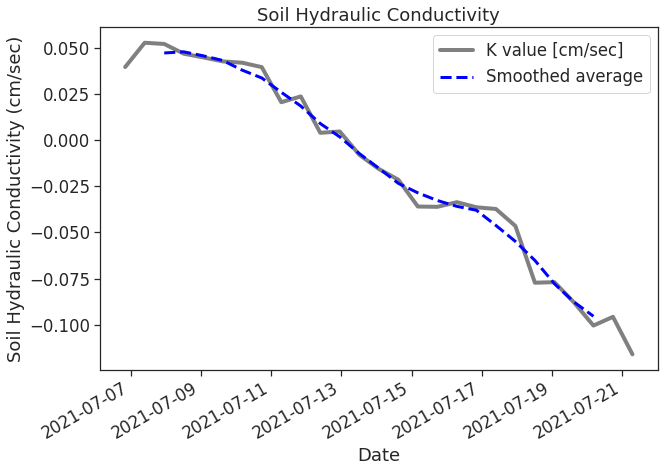

In [6]:
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# values for y axis:
ax.plot(df['k(cm/s)'],label='K value [cm/sec]', color="grey", linewidth=4 )
smooth = df['k(cm/s)'].rolling(5, center=True).mean() 
ax.plot(smooth, label='Smoothed average', color="blue", linestyle="--", linewidth=3)
# axes labels and figure title
ax.set_xlabel('Date')
ax.set_ylabel('Soil Hydraulic Conductivity (cm/sec)')
ax.set_title('Soil Hydraulic Conductivity')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slated dates
ax.legend(loc = 'upper right')

### Soil Retention Curve


In [7]:
# Volumetric moisture content:
height = 6 #[cm]. enter the height of soil in ring
start_volume = Area * height                     # input the initial volume of the sample: soil + saturated water
soil_weight = 788.2                              # input the weight of soil whithout water (air dried)
Vw = df['Weight_(g)'] - soil_weight -ring_weight # volume of the water = weight of water = weight of sample - weight of soil
df['ϴ'] = Vw / start_volume
# df['averege_p(cm)'] = (df['Pressure_Bottom_(cmH20)']+df['Pressure_Top_(cmH20)'])/2 # calc the average between the two pressure sensors. needed for the retension curve. further details see under 'Links'   
df['averege_p(cm)'] = df['Pressure_Bottom_(cmH20)'] # using only readings from the bottom pessure sensor, because the the top sensor was faulty.

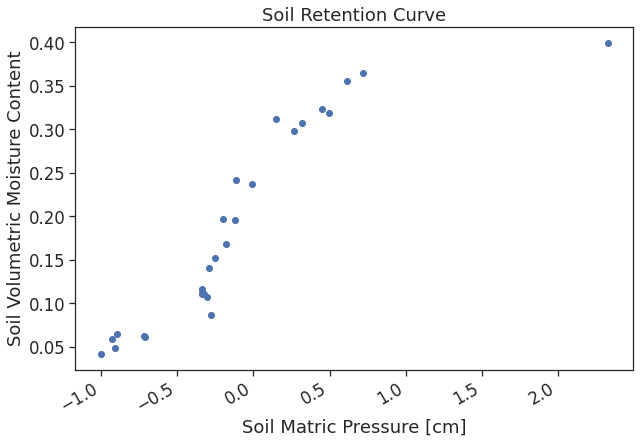

In [8]:
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# values for y axis:
ax.plot(df['averege_p(cm)'],df['ϴ'],'o', linewidth=4 )
# axes labels and figure title
ax.set_ylabel('Soil Volumetric Moisture Content')
ax.set_xlabel('Soil Matric Pressure [cm]')
ax.set_title('Soil Retention Curve')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slated dates

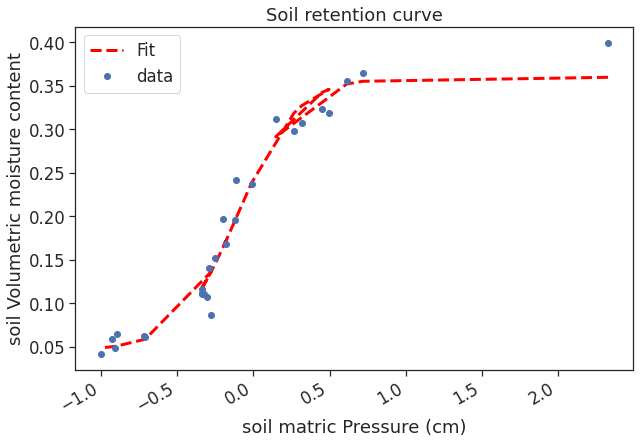

In [9]:
# Fitting the data:
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)
ydata = df['ϴ']
xdata = df['averege_p(cm)']
# min(ydata) = df['ϴ'].min()
p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')
x = df['averege_p(cm)']
y = sigmoid(x, *popt)

# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# values for y axis:
ax.plot(x,y,'--',color='red', linewidth=3 , label = "Fit")
ax.plot(df['averege_p(cm)'],df['ϴ'],'o', linewidth=4, label = "data" )
# axes labels and figure title
ax.set_ylabel('soil Volumetric moisture content')
ax.set_xlabel('soil matric Pressure (cm)')
ax.set_title('Soil retention curve')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slated dates
plt.legend(loc='best')

## Discussion

1. In general, one can be positively impressed by the results of the experiment. Both the retention curve and the hydraulic conductivity graph are consistent with the trend appearing in the academic literature. <br/>
Hydraulic conductivity is directly affected by the moisture content of the soil. Therefore, as the experiment progressed, more water evaporated from the system and so did the hydraulic conductivity. At the beginning of the experiment the moisture content is relatively constant because up to the value of the air entry value, the soil is saturated and the hydraulic conductivity is equal to the saturated hydraulic conductivity.<br/>
The trend seen in the retention curve also makes sense - the higher the moisture content the higher the matrix head. When the pressure is higher than the air entry value, no increase in the moisture content is observed because the soil is saturated and the graph reaches the plateau. It is important to note that there are values of matrix head in which there is a duplication in the moisture content, so the graph is not "smooth" (probably as a result of abnormal jumps in pressure measurements and the return to normal measurements).

2. It is important to note that the values of the matrix head itself cannot be considered reliable - since we did not perform a calibration curve for the pressure sensors. If we were to obtain the appropriate pressure device, we would prepare a calibration curve and multiply the values by the appropriate factor. In addition, the pressure sensors we used are designed to measure air pressure rather than water pressure. Next time it is recommended to use water pressure sensors to make the measurement accurate. Consequently, it is not possible to determine for the current soil the values of the hydraulic conductivity, the value of the air entry value and the exact dependence between the moisture content and the matrix head (in order to be precise in all of the above, one must know the matrix head correctly).

3. During the experiment we used a loadcell adjusted for measurements of up to 20 kg. This scale does not fit the system we tested enough, because we measured a change in the values of grams. However, it is important to note that the final weight measured at the end of the experiment matched the system weight without water measure at the beginning of the experiment. However, it is recommended to use a loadcell that corresponds to the measurement values.


## Links and sources

1. For more details about the Hyprop Meter click [here](https://www.metergroup.com/environment/articles/how-to-measure-soil-hydraulic-conductivity-which-method-is-right-for-you/) 
2. For the official manual of the Hyprop: [here](http://library.metergroup.com/Manuals/18263_HYPROP_Manual_Web.pdf)
3. For detailed instructions visit our instructable: [here](https://www.instructables.com/Measuring-Hydraulic-Properties-of-Soil-With-ESP32/)
4. More info about the soil retention curve [here](https://open.library.okstate.edu/rainorshine/chapter/3-3-soil-water-retention/)
5. More about the fit we used [here](https://machinelearningmastery.com/curve-fitting-with-python/)